## (i) Data preprocessing on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    float64
 6   X7      768 non-null    float64
 7   X8      768 non-null    float64
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(10)
memory usage: 101.4 KB
None
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
2

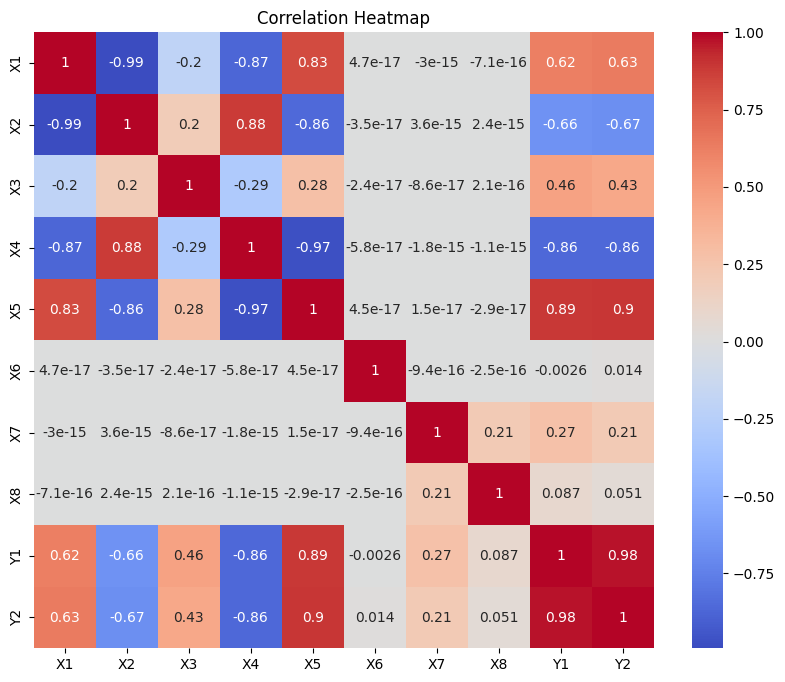

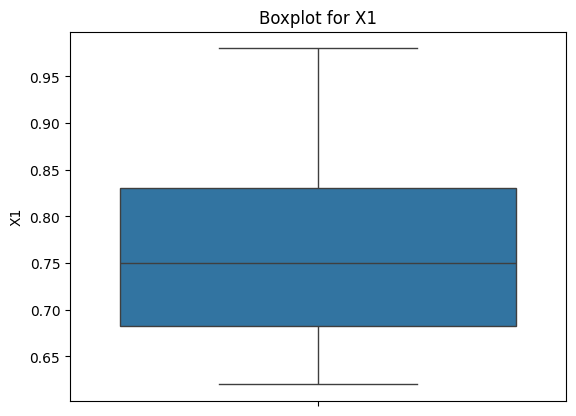

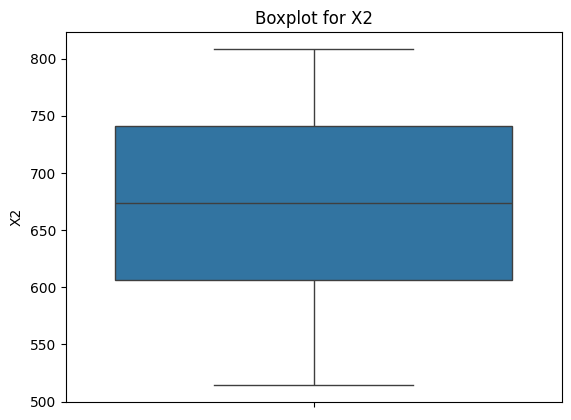

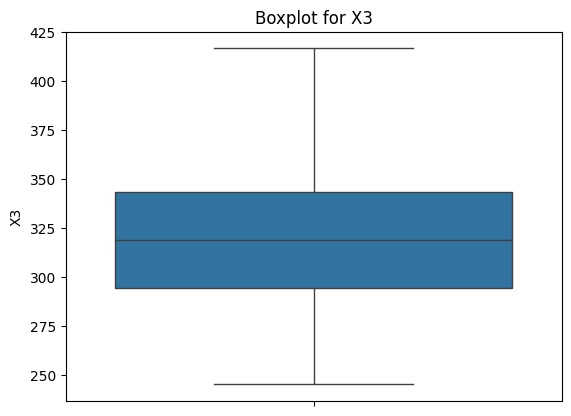

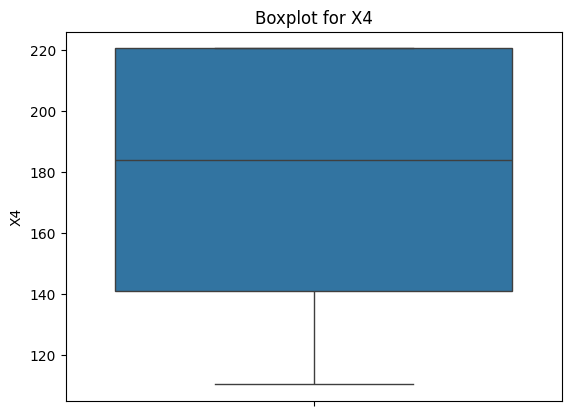

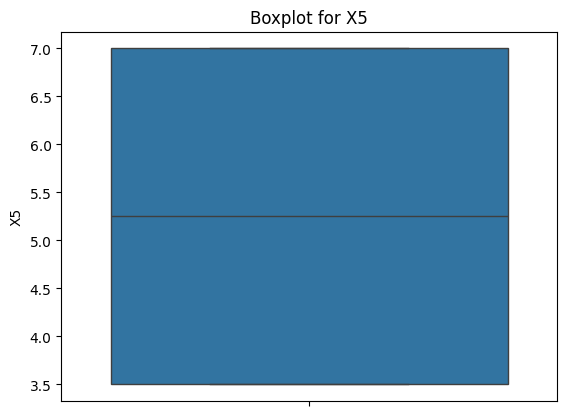

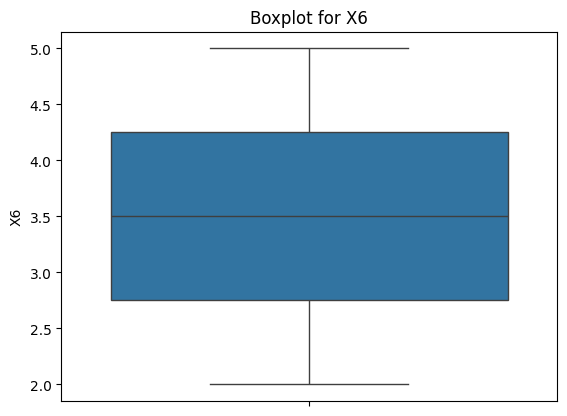

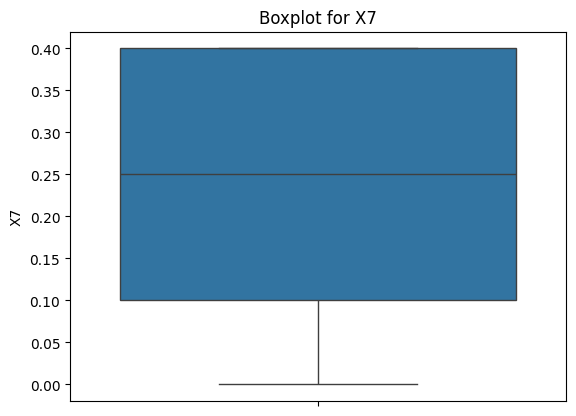

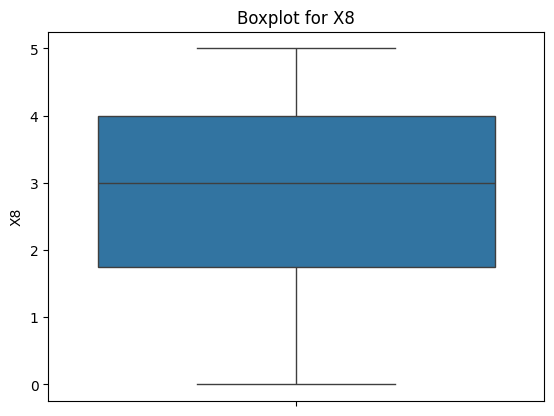

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# Load the dataset
df = pd.read_csv("energy_data.csv")

# Check the dataset structure
print(df.info())  # Check for missing values and data types
print(df.describe())  # Check statistical summary

# Check for missing values
print(df.isnull().sum())  # Missing values count per column

# Handle missing values (if any) using SimpleImputer (mean imputation as an example)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Outlier detection (using box plots)
for col in df.columns[:-2]:  # Exclude the two target columns
    sns.boxplot(df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


## (ii) Splitting the dataset into an 80:20 ratio for training and testing using the sklearn library.

In [4]:
from sklearn.model_selection import train_test_split

# Splitting data into features (X) and target (y)
X = df_imputed[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]  # Features
y = df_imputed['Y1']  # Target variable (Heating Load)

# Splitting into training and testing datasets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")


Train set: (1036, 8), Test set: (260, 8)


## Manual linear regression implementation

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
manual_model.fit(X_train_scaled, y_train, learning_rate=0.001, epochs=1000)


In [9]:
print(np.isnan(X_train).sum(), np.isinf(X_train).sum())
print(np.isnan(y_train).sum(), np.isinf(y_train).sum())


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
dtype: int64 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
dtype: int64
0 0


In [11]:
# Normalize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Updated Linear Regression class
class LinearRegressionScratch:
    def __init__(self):
        self.weights = None

    def fit(self, X, y, learning_rate=0.001, epochs=1000):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(epochs):
            predictions = np.dot(X, self.weights)
            errors = predictions - y
            gradients = (2 / n_samples) * np.dot(X.T, errors)
            self.weights -= learning_rate * gradients

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        return np.dot(X, self.weights)

# Train manual linear regression model
manual_model = LinearRegressionScratch()
manual_model.fit(X_train_scaled, y_train, learning_rate=0.001, epochs=1000)

# Predictions using the manual model
y_pred_manual = manual_model.predict(X_test_scaled)

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred_manual)
rmse = np.sqrt(mse)  # Compute RMSE
r2 = r2_score(y_test, y_pred_manual)

print(f"Manual Linear Regression:\nMSE: {mse:.4f}, RMSE: {rmse:.4f}, R2 Score: {r2:.4f}")


Manual Linear Regression:
MSE: 15.6310, RMSE: 3.9536, R2 Score: 0.7510


## Sklearn linear regression implementation

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Train sklearn linear regression model
sklearn_model = LinearRegression()
sklearn_model.fit(X_train_scaled, y_train)

# Predictions using sklearn model
y_pred_sklearn = sklearn_model.predict(X_test_scaled)

# Evaluation for sklearn model
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f"Sklearn Linear Regression:\nMSE: {mse_sklearn:.4f}, RMSE: {rmse_sklearn:.4f}, R2 Score: {r2_sklearn:.4f}")


Sklearn Linear Regression:
MSE: 4.7827, RMSE: 2.1869, R2 Score: 0.9238


## Ridge regression

In [13]:
# Train ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predictions using ridge model
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluation for ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression:\nMSE: {mse_ridge:.4f}, RMSE: {rmse_ridge:.4f}, R2 Score: {r2_ridge:.4f}")


Ridge Regression:
MSE: 4.7943, RMSE: 2.1896, R2 Score: 0.9236


## Lasso regression

In [14]:
# Train lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Predictions using lasso model
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluation for lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression:\nMSE: {mse_lasso:.4f}, RMSE: {rmse_lasso:.4f}, R2 Score: {r2_lasso:.4f}")


Lasso Regression:
MSE: 5.1603, RMSE: 2.2716, R2 Score: 0.9178


## Comparing the performance of the manual model and the sklearn model and plotting the predicted vs actual values for both models.

Manual Linear Regression:
MSE: 15.6310, RMSE: 3.9536, R2 Score: 0.7510
Sklearn Linear Regression:
MSE: 4.7827, RMSE: 2.1869, R2 Score: 0.9238


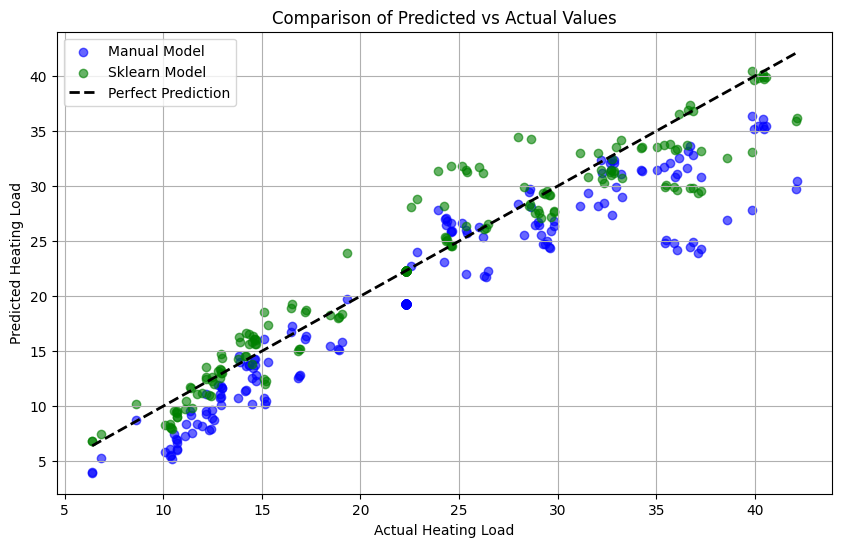

In [16]:
# Compare Manual and Sklearn models
print(f"Manual Linear Regression:\nMSE: {mse:.4f}, RMSE: {np.sqrt(mse):.4f}, R2 Score: {r2:.4f}")
print(f"Sklearn Linear Regression:\nMSE: {mse_sklearn:.4f}, RMSE: {rmse_sklearn:.4f}, R2 Score: {r2_sklearn:.4f}")

# Visualization: Predicted vs Actual Values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Manual model predictions
plt.scatter(y_test, y_pred_manual, color='blue', label='Manual Model', alpha=0.6)
# Sklearn model predictions
plt.scatter(y_test, y_pred_sklearn, color='green', label='Sklearn Model', alpha=0.6)

# Line showing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Comparison of Predicted vs Actual Values")
plt.legend()
plt.grid(True)
plt.show()


## Proposing energy efficiency improvement suggestions based on the insights from the model results

In [20]:
# Analyze feature coefficients from sklearn model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("Feature Importance (based on sklearn Linear Regression):\n", coefficients)

# Energy Efficiency Improvement Suggestions based on feature coefficients
print("""
Energy Efficiency Improvement Suggestions:
1. Focus on optimizing features with the highest positive coefficients:
   - Overall Height (X5) has the highest positive coefficient, suggesting that reducing the height or optimizing the design can help reduce heating load. Consider designing shorter buildings to minimize heating needs.
   - Glazing Area (X7) also contributes positively to heating load. Minimize the glazing area or use energy-efficient glazing solutions to reduce heat loss.

2. Minimize or optimize features with negative coefficients:
   - Relative Compactness (X1) has the strongest negative coefficient, which means increasing the compactness of the building (less exposed surface area) can reduce heating load. Design buildings with a compact shape to reduce energy consumption.
   - Surface Area (X2) and Roof Area (X4) have negative coefficients, suggesting that reducing the surface area or improving roof insulation can decrease energy consumption. Prioritize insulation of walls and roof areas to minimize heat loss.

3. Optimize Wall and Roof Area:
   - Wall Area (X3) has a moderate positive effect on heating load. Insulate walls effectively to minimize heat loss, reducing the heating load.
   - Roof Area (X4) has a negative coefficient, meaning that improving roof insulation will help reduce heating needs. Focus on reducing roof area if possible or insulating roofs better.

4. Consider Building Orientation and Glazing Distribution:
   - Orientation (X6) has a minor positive effect on heating load. Optimize building orientation to maximize sunlight exposure during colder months, helping to reduce heating requirements.
   - Glazing Area Distribution (X8) has a small positive effect. Design the distribution of windows to optimize natural lighting and reduce the need for artificial heating.

These suggestions can help optimize the building design and reduce heating energy consumption, leading to better energy efficiency.
""")


Feature Importance (based on sklearn Linear Regression):
   Feature  Coefficient
4      X5     5.818107
6      X7     2.095914
2      X3     0.579929
7      X8     0.208394
5      X6     0.031160
1      X2    -2.597233
3      X4    -2.803147
0      X1    -4.918256

Energy Efficiency Improvement Suggestions:
1. Focus on optimizing features with the highest positive coefficients:
   - Overall Height (X5) has the highest positive coefficient, suggesting that reducing the height or optimizing the design can help reduce heating load. Consider designing shorter buildings to minimize heating needs.
   - Glazing Area (X7) also contributes positively to heating load. Minimize the glazing area or use energy-efficient glazing solutions to reduce heat loss.

2. Minimize or optimize features with negative coefficients:
   - Relative Compactness (X1) has the strongest negative coefficient, which means increasing the compactness of the building (less exposed surface area) can reduce heating load. Des